In [1]:
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sys
sys.path.append('../')
from scripts.utils import plot_groupby

In [42]:
# read the datasets
df = pd.read_csv('../data/raw/HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
# quick overview the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# check missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# describe the datasets
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# unique values in each columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [3]:
# Low-cardinality categorical features
low_cardinality = (df.nunique() == 1)
droped_column = low_cardinality[low_cardinality].index.to_list()
droped_column

['EmployeeCount', 'Over18', 'StandardHours']

In [4]:
# remove low cardinality categorical features
df.drop(columns=droped_column, inplace=True)

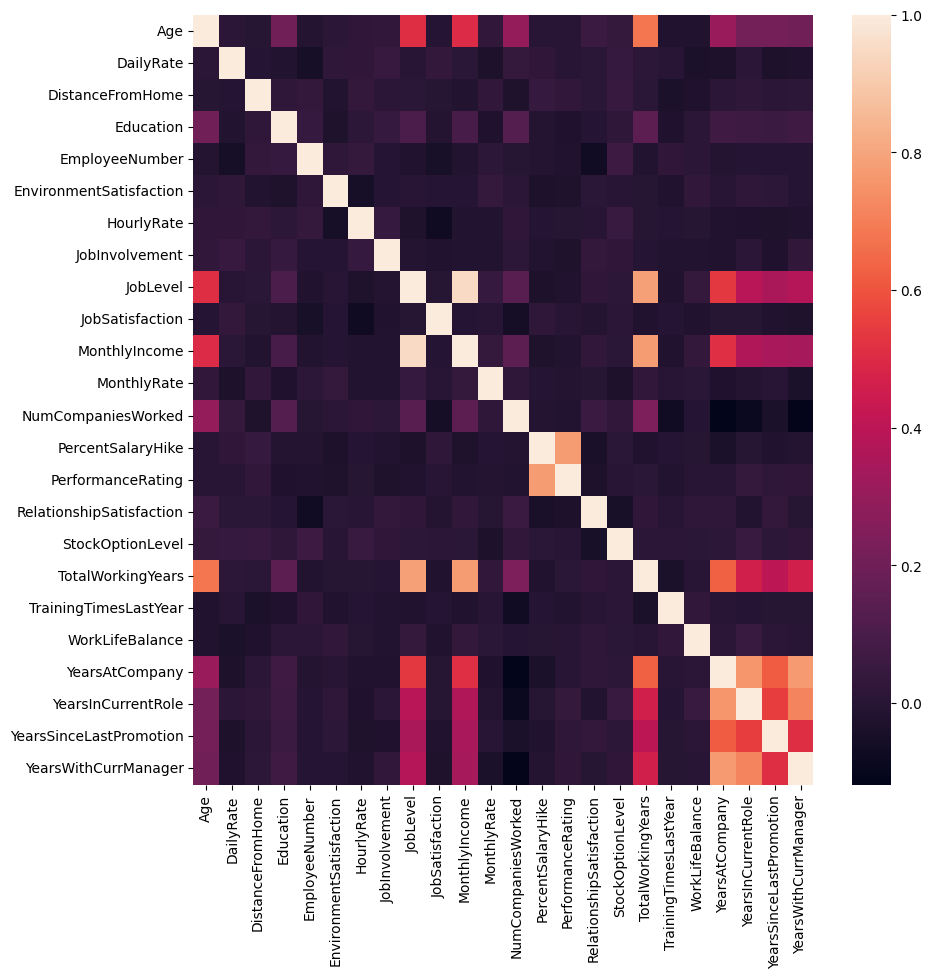

In [26]:
# multicollinearity
fig, ax = plt.subplots(figsize=(10,10))
corr = df.select_dtypes("int64").corr()
sns.heatmap(corr, annot=False, ax=ax);

## Explore the columns

### Attrition

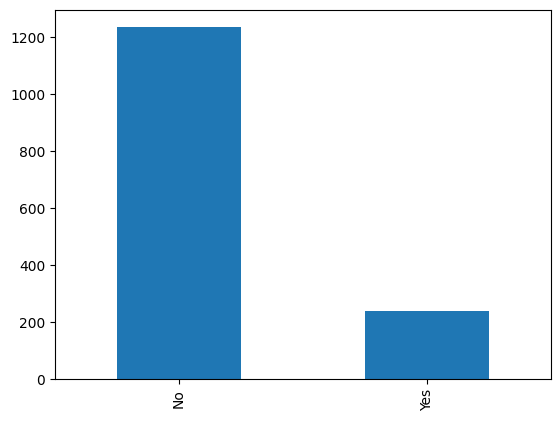

In [30]:
df["Attrition"].value_counts().plot(kind="bar");

### Age

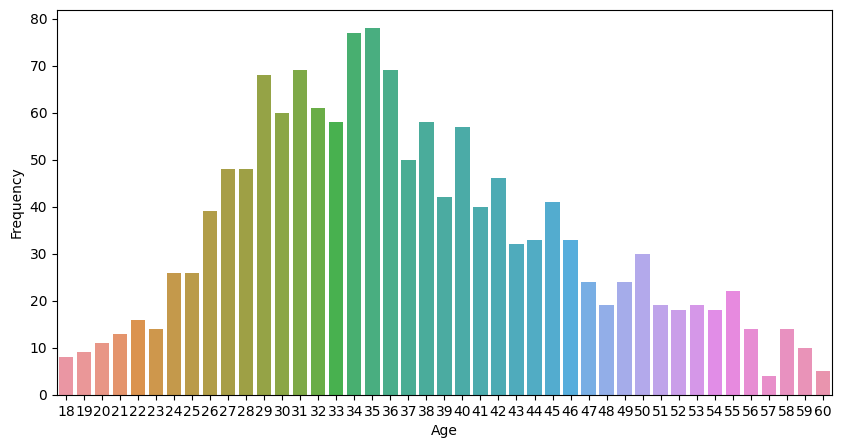

In [43]:
# plot the Age
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Age', data=df, ax=ax)
plt.xlabel("Age")
plt.ylabel("Frequency");

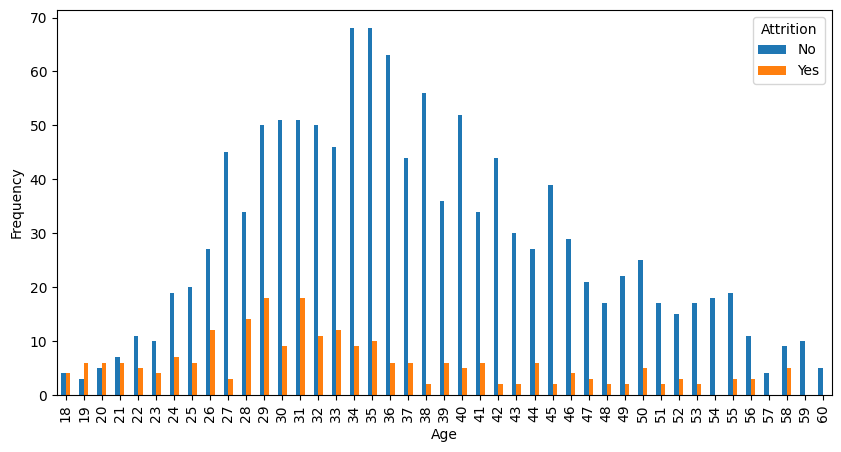

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar', ax=ax)
plt.xlabel("Age")
plt.ylabel("Frequency");

- Younger employees under the age of 21 are more likely to leave the job, whereas older employees above 35 years of age are more likely to stay with the company. 
- The majority of employees fall within the age range of 25 to 45.

### Rating

In [52]:
# grouped the daily rate and montly rating
df["HourlyRate"] = pd.cut(df["HourlyRate"], bins=4)
df["DailyRate"] = pd.cut(df["DailyRate"], bins=5)
df['MonthlyRate'] = pd.cut(df["MonthlyRate"], bins=5)

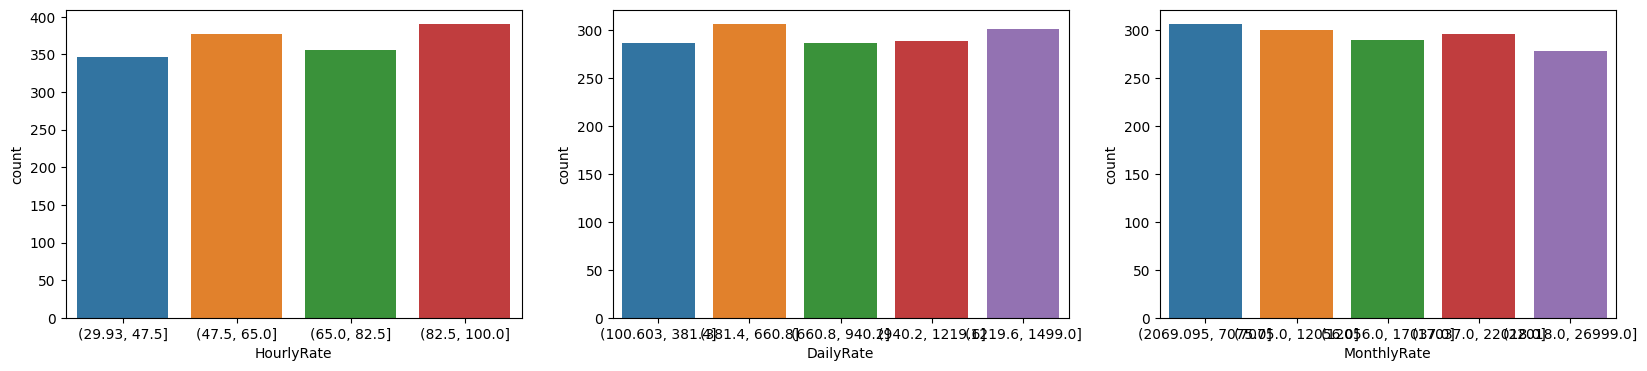

In [53]:
rating_column = ["HourlyRate", "DailyRate", "MonthlyRate"]

fig, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=3)

for i, rate in enumerate(rating_column):
    sns.countplot(x=rate, data=df, ax=ax[i]);

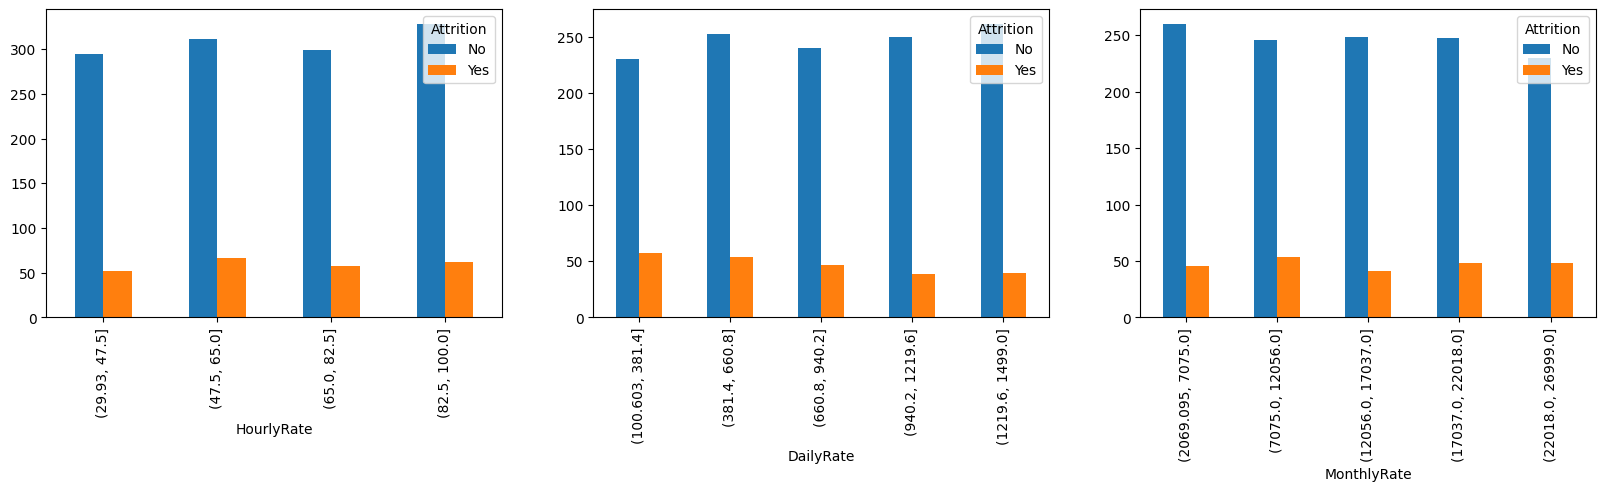

In [55]:
fig, ax = plt.subplots(figsize=(20, 4), ncols=3, nrows=1)
for i, rate in enumerate(rating_column):
    df.groupby([rate, 'Attrition']).size().unstack().plot(kind='bar', ax=ax[i]);

The size of the Attrition remains constant across both the daily rate and monthly rate groups. It doesn't contribute to our model. We need to remove these columns from our analysis.



In [56]:
# drop daily rate and montly rate
rating_column = ["HourlyRate", "DailyRate", "MonthlyRate"]
df.drop(columns=rating_column, inplace=True)

### Business Travel

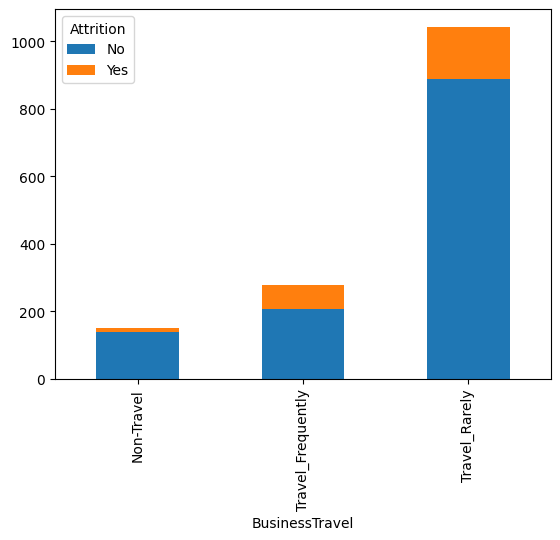

In [69]:
df.groupby(['BusinessTravel', 'Attrition']).size().unstack().plot(kind='bar', stacked=True);

- Most employees do not travel often, and a mojority of them who rarely travel also end up leaving their job
- The employees who do not travel choose to reamain in their job.

### Department and Educations

In [11]:
education_background = ["Department", "Education", "EducationField"]

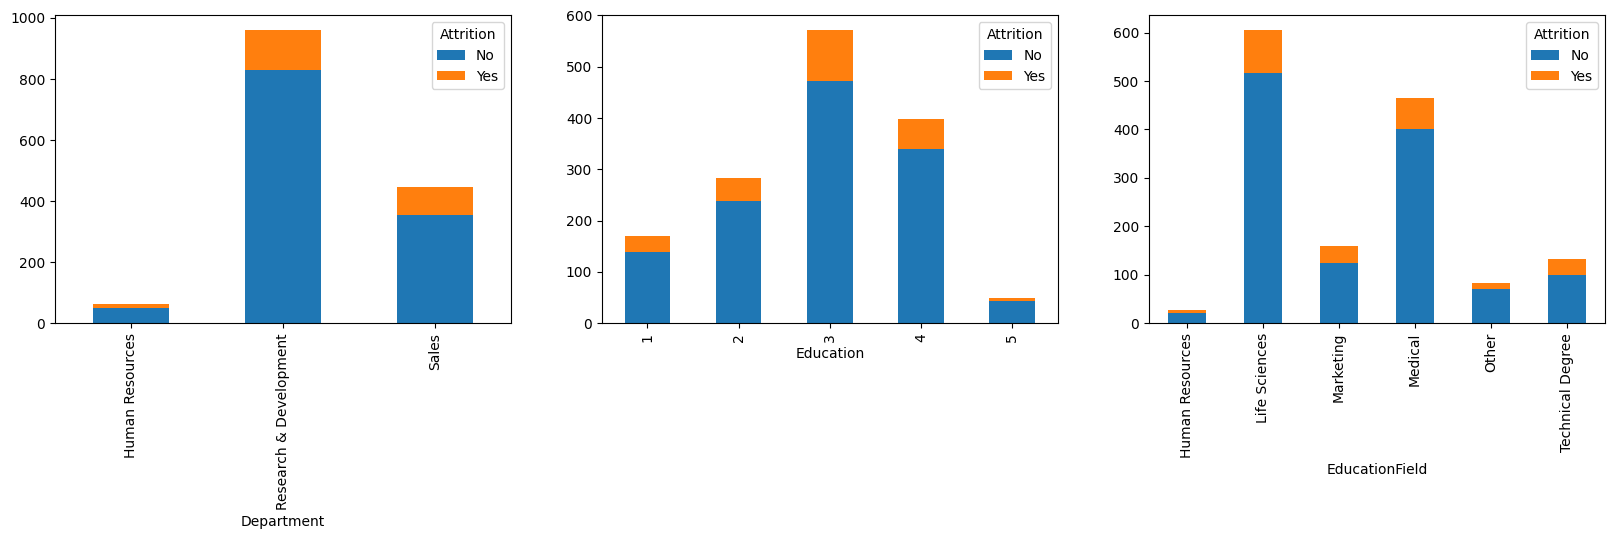

In [14]:
# Department, Eduction, EductionField
fig, ax = plt.subplots(figsize=(20, 4), ncols=3, nrows=1)

for i, col in enumerate(education_background):
    df.groupby([col, "Attrition"]).size().unstack().plot(kind='bar', stacked=True, ax=ax[i]);

### Distance From Home

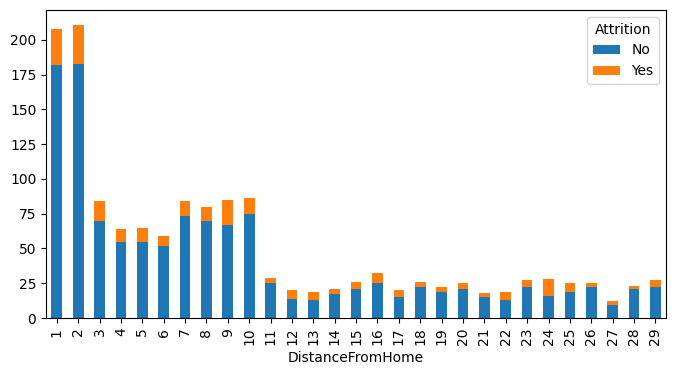

In [15]:
plot_groupby(df, 'DistanceFromHome', 'Attrition')

- The majority of employees are located within a radius of 1 to 2 kilometers.
- We do not have any clear evidence that suggests the distances from an employee's home has an effect on whether they leave their job or not.

### Gender

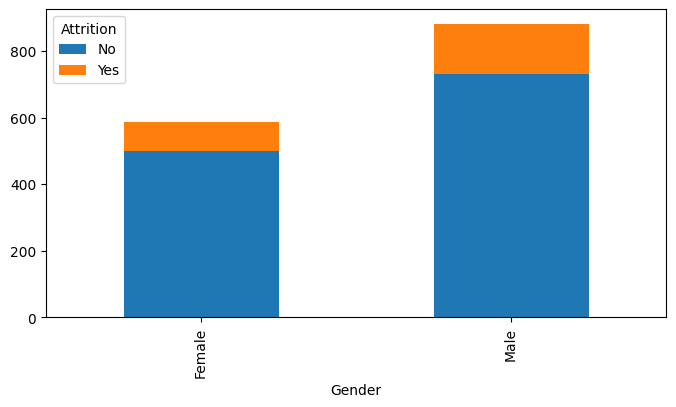

In [16]:
sex = plot_groupby(df, 'Gender', 'Attrition')
sex

### Job

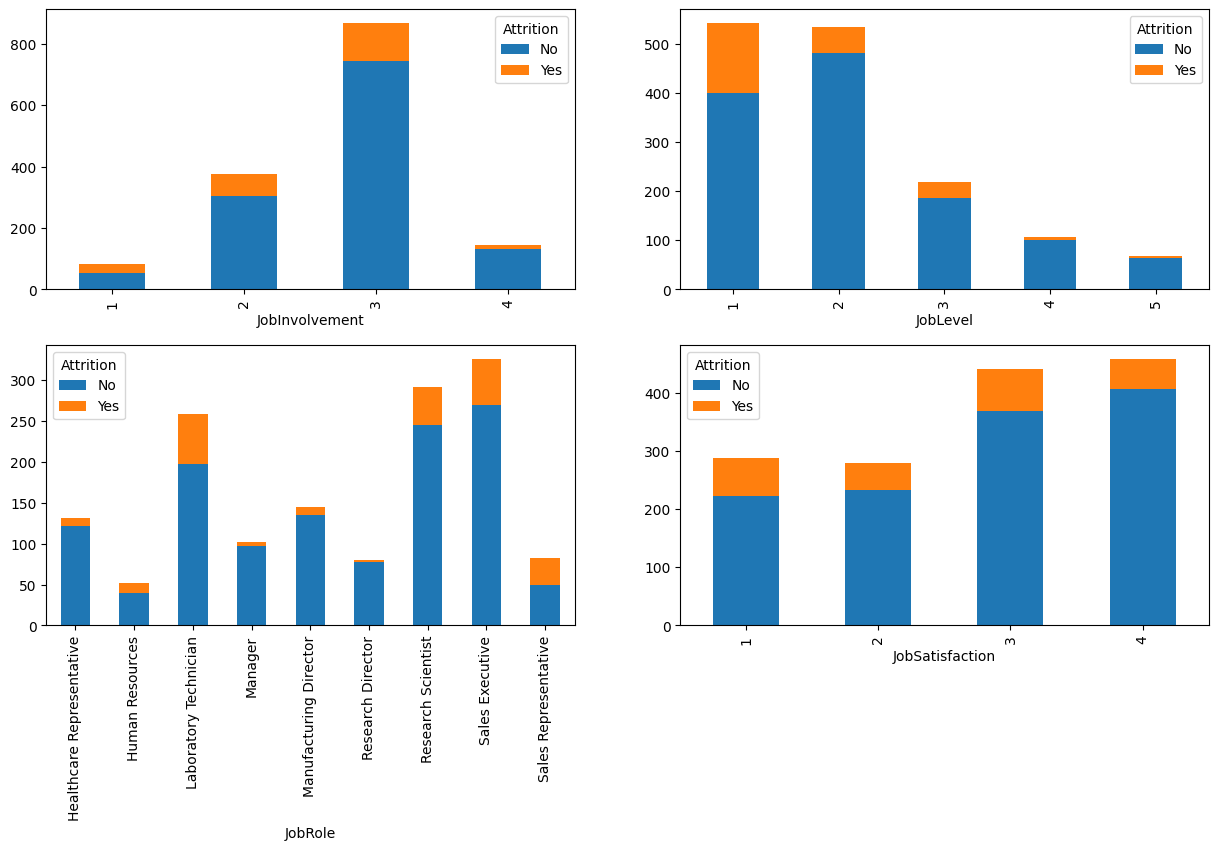

In [26]:
Job = ["JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction"]
fig, ax = plt.subplots(figsize=(15, 8), ncols=2, nrows=2)
ax = ax.flatten()
for i, col in enumerate(Job):
    df.groupby([col, 'Attrition']).size().unstack().plot(kind="bar", stacked=True, ax=ax[i])

##### Job Involvement
    - 
##### Job Level
    - Most of employees holds job level 1 and 2.
    - Individuals in job Level 1 have a higher probability of leaving their jobs compared to individuals in other job levels.

##### Job Role 
    - Laboratory Technicians, Research Scientists, Peoples in Sales are more likely to leave their jobs compared to individuals in other roles.
    - Individuals in higher roles such as Healthcare Representatives, Managers, and Directors have a lower likelihood of leaving their jobs.
##### Job Satisfaction
    - 

### Income

In [43]:
df["MonthlyIncome"] = pd.cut(df["MonthlyIncome"], bins=[1000, 6500, 19999])

In [32]:
df["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

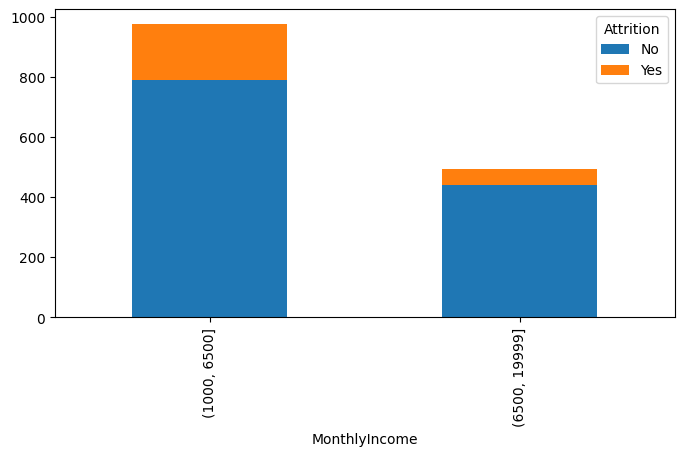

In [44]:
plot_groupby(df, 'MonthlyIncome', 'Attrition')

- Most employees earn incomes that are below the average.
- Individuals who earn incomes below the average have a higher probability of leaving their jobs compared to those who earn above the average income.

### Martial Status

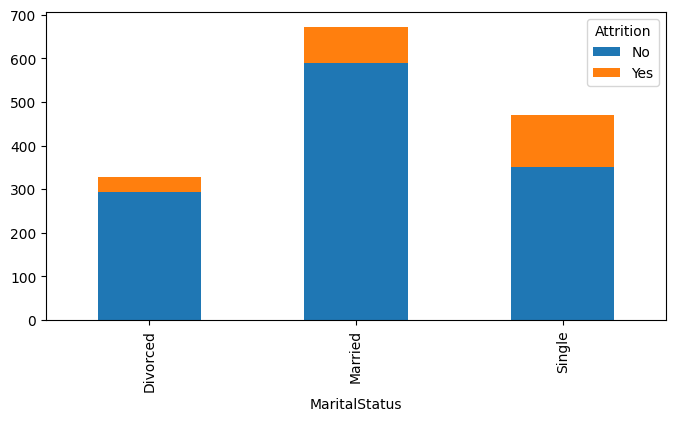

In [59]:
plot_groupby(df, "MaritalStatus", "Attrition")

#### Save the data

In [49]:
df.to_csv('../data/clean_HR_Analytics.csv', index=False)